In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import norm
from mpl_toolkits import mplot3d
%matplotlib inline 

In [2]:
def pdf_BND(x, mean, covariance):
    x_m = x - mean
    return np.linalg.det((1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance)))) * 
            np.exp(-(np.matmul(np.matmul(x_m.transpose(), np.linalg.inv(covariance)), x_m) / 2)))

def pdf(x, mean, variance):
    return (1/np.sqrt(2* np.pi * variance) * np.exp( -((x - mean) ** 2)/(2*variance)))

In [18]:
x = pdf_BND(np.array([[3],[2]]), [0.002, 0.005], [
    [1, 0.625],
    [0.625, 1.5625]
])
print(x)

def pdf_BND(x, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return np.linalg.det((1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance)))) * 
            np.exp(-(np.matmul(np.matmul(x_m.transpose(), np.linalg.inv(covariance)), x_m) / 2)))

-1.3551407596343129e-11


FloatSlider(value=-0.04999999999999649, description='$\\mu$1:', max=4.0, min=-4.0, step=0.01)

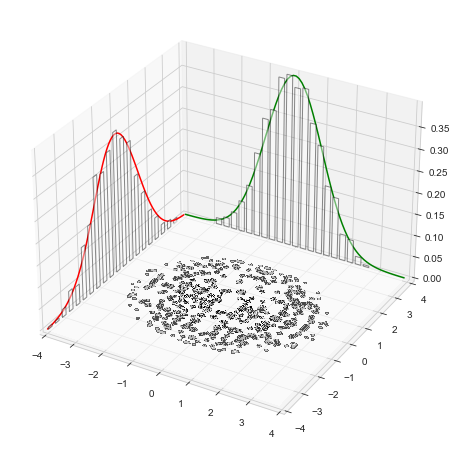

interactive(children=(IntSlider(value=0, description='mean', max=1), Output()), _dom_classes=('widget-interact…

<function __main__.f(mean)>

In [23]:
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [8, 8]


mu = [0, 0]
rho = 0
sigma_1 = 1
sigma_2 = 1.25
covariance = [
    [sigma_1**2, ro*sigma_1*sigma_2],
    [ro*sigma_1*sigma_2, sigma_2**2]
]

curve1_x = np.arange(-4, 4, 0.1)
curve1_y = np.array([4] * 80)
curve1_rand_x = norm.rvs(loc=mu[0], scale=np.sqrt(covariance[0][0]), size=1000)

curve2_y = np.arange(-4, 4, 0.1)
curve2_x = np.array([-4] * 80)
curve2_rand_y = norm.rvs(loc=mu[1], scale=np.sqrt(covariance[1][1]), size=1000)

mu[0] = np.mean(curve1_x)
mu[1] = np.mean(curve2_y)

#Ploting the graphs
sns.set_style('whitegrid')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

#PDF of x
ax.plot3D(curve1_x, curve1_y, pdf(curve1_x, mu[0], covariance[0][0]), color='g');
n = np.histogram(curve1_rand_x, density=True, bins=20);
heights = n[0]
x_cord = n[1][:20]
ax.bar(x_cord, heights, zs=4, zdir='y', color='w', edgecolor='k', width=0.2, alpha=0.45);

#PDF of y
ax.plot3D(curve2_x, curve2_y, pdf(curve2_y, mu[1], covariance[1][1]), color='r');
n = np.histogram(curve2_rand_y, density=True, bins=20);
heights_2 = n[0]
y_cord = n[1][:20]
ax.bar(y_cord, heights_2, zs=-4, zdir='x', color='w', edgecolor='k', width=0.2, alpha=0.45);

#Ploting the contour on floor
length = len(curve1_x)
z = np.zeros((length, length))
for i in range(length):
    for j in range(length):
        z[i, j] = pdf_BND(np.matrix([[curve1_x[i]], [curve2_y[j]]]), mu, covariance)
ax.contourf(curve1_x, curve2_y, z, colors=['white','black'], alpha=0.6, levels=1000);


w = widgets.FloatSlider(
    value=mu[0],
    min=-4.00,
    max=4.00,
    step=0.01,
    description=r'$\mu$1:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(w)



def f(mean):
    mu[0] = mean
    print(mu[0], mean)
    ax.plot3D(curve1_x, curve1_y, pdf(curve1_x, mu[0], covariance[0][0]), color='g')


widgets.interact(f, mean=0)



















#z = np.array(pdf_BND(x, mu, covariance) for x in np.matrix(zip(curve1_x, curve2_y)))

#ax.contourf(curve1_x, curve2_y, z)
#ax.scatter(curve1_x, curve2_y, z, c='k');

1.125